## Observations and Insights 

* Observation 1: In multiple instances, I saw that the drugs Capomulin and Ramicane stood out compared to the other drug regimens. It seems that they had a far larger efficacy than the rest of the drugs, which is evident in the boxplot chart, where the tumor volumes for both Capomulin and Ramicane are far lower than the rest of the treatments.

* Observation 2: The results of the drug regimen efficacy show that most drugs tend to stay within the same range of tumor volumes, at around the 50 to 70 range. There is also only one outlier in the whole dataset, for a mouse in the Infubinol regimen. This tells us that the results of the data is pretty accurate for what was provided. 

* Observation 3: The correlation value between the average tumor volume and weight of Capomulin mice, which is one of the more efficient regimens, is at 0.84. This value was very close to 1, implying a positive correlation between the average tumor volume and weight of Capomulin mice. This means that, theoretically, maybe higher weight is related to larger tumor sizes, or that lower weight is usually related to smaller tumor sizes.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pprint import pprint
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [3]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset (common column is MOUSE ID)
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Testing new DF output to get a more detailed idea of the dataset

combined_mouse_df.to_csv("Resources/Combined_mouse_data.csv", index=False)

In [6]:
# Checking the number of mice.

combined_mouse_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
#Calculate total mice without duplicates
total_mice = len(combined_mouse_df['Mouse ID'].unique())
total_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint (GroupBy?). 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_df[combined_mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (also trying out copy function)
cleaned_mouse_df = combined_mouse_df[(combined_mouse_df['Mouse ID'] !='g989')].copy()
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(cleaned_mouse_df['Mouse ID'].unique())
clean_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

by_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])

In [12]:
#Calculate mean of tumor volume 
avg_tumor = by_regimen['Tumor Volume (mm3)'].mean()

#Calculate median of tumor vol
median_tumor = by_regimen['Tumor Volume (mm3)'].median()

#Calculate the variance of tumor vol
variance_tumor = by_regimen['Tumor Volume (mm3)'].var()

#standard deviation of tumor vol
std_dev_tumor = by_regimen['Tumor Volume (mm3)'].std()

#SEM of the tumor volume
sem_tumor = by_regimen['Tumor Volume (mm3)'].sem()

In [13]:
# Assemble the resulting series into a single summary dataframe.
tumor_summary_df1 = pd.DataFrame({"Mean Tumor Volume": avg_tumor,
                                "Median Tumor Volume": median_tumor,
                                "Variance of Tumor Volume": variance_tumor,
                                "Standard Deviation of Tumor Volume": std_dev_tumor,
                                "SEM of Tumor Volume": sem_tumor})

tumor_summary_df1

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line (.agg?)

tumor_summary_df2 = by_regimen["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

#tumor_summary_df2

In [15]:
#Cleaning up the second dataframe to match column names of the one above it

tumor_summary_df2 = tumor_summary_df2.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance of Tumor Volume",
                                                   "std":"Standard Deviation of Tumor Volume ", 
                                                   "sem":"SEM of Tumor Volume"})

tumor_summary_df2

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
#Count the timepoints by drug regimen group
timepoints_by_regimen = by_regimen["Timepoint"].count()

timepoints_by_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0.5, 1.0, 'Total Timepoints per Drug Regimen')

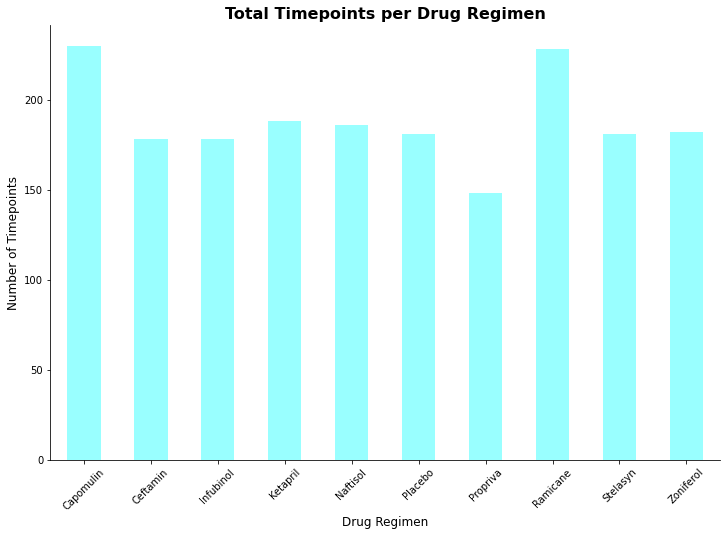

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar_plot = timepoints_by_regimen.plot.bar(color="cyan", rot=45, alpha=0.4, align="center")
pandas_bar_plot.set_xlabel("Drug Regimen", fontsize=12)
pandas_bar_plot.set_ylabel("Number of Timepoints", fontsize=12)
pandas_bar_plot.set_title("Total Timepoints per Drug Regimen", fontsize=16, fontweight="bold")

Text(0, 0.5, 'Number of Timepoints')

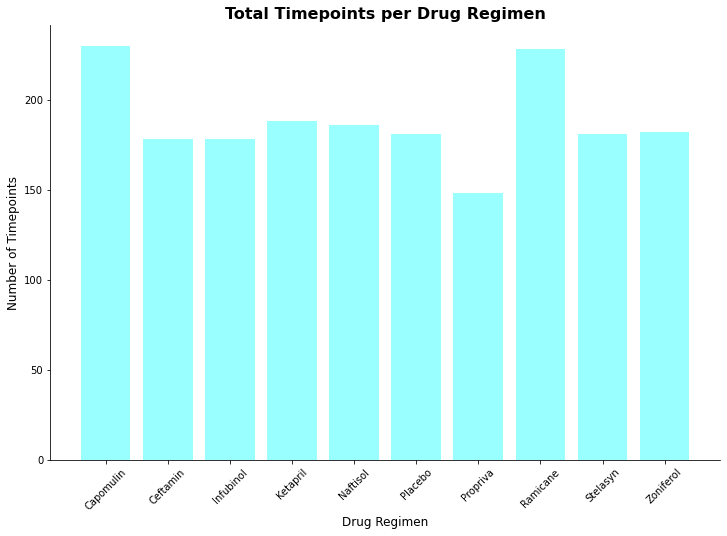

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Check class notes 5.1/5.2 examples
x_axis = np.arange(len(timepoints_by_regimen))
y_axis = timepoints_by_regimen

#Make ticks and get a list of the drug names for labels next to tick locations
drug_list = list(timepoints_by_regimen.index.values)
tick_locations = [value for value in x_axis]

#Putting together bar plot with proper labels and values
plt.bar(x_axis,y_axis, color="cyan", align="center", alpha=0.4)
plt.xticks(tick_locations, drug_list, rotation=45)
plt.title("Total Timepoints per Drug Regimen",fontsize=16, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Timepoints",fontsize=12)

In [19]:
#Calculate the sex/gender distribution of the overall mice count

by_gender = cleaned_mouse_df.groupby(["Sex"])

gender_count = by_gender["Sex"].count()
gender_count

Sex
Female    922
Male      958
Name: Sex, dtype: int64

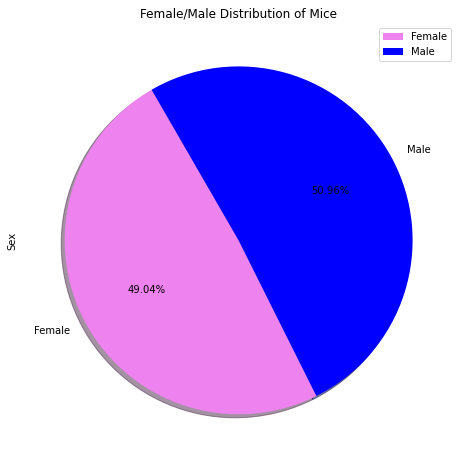

In [20]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie_chart = gender_count.plot(kind="pie", title=("Female/Male Distribution of Mice"),
                                     colors=["violet","blue"], autopct = "%.2f%%", shadow = True, startangle=120)

#Figure out how to move labels into pie chart so they're not outside of it (use startangle)
pandas_pie_chart.legend(loc="best")

Text(0, 0.5, 'Sex')

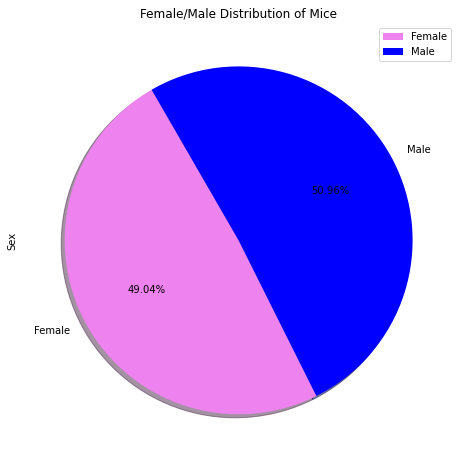

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count_df = gender_count.reset_index(name="Sex Count")

sex_labels = list(gender_count_df["Sex"])
explode = (0,0)

plt.pie(gender_count, explode=explode, labels=sex_labels, colors=["violet","blue"],
        autopct = "%.2f%%", shadow = True, startangle=120)
plt.legend(loc="best")
plt.title("Female/Male Distribution of Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse_id = cleaned_mouse_df.groupby('Mouse ID')
maximum_timepoints = by_mouse_id['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_timepoint_df = pd.merge(maximum_timepoints, cleaned_mouse_df, on=['Mouse ID','Timepoint'])
tumor_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for later use with for loop (and later for plot labels)
regimen_list = list(tumor_timepoint_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
   
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimen_list:    
    #Create new variable with Drug Regimen info
    mouse_regimen = tumor_timepoint_df[(tumor_timepoint_df['Drug Regimen']==regimen)]
    #Add subset
    tumor_volumes = mouse_regimen['Tumor Volume (mm3)']
    
    #Add data back to empty list
    tumor_vol_data.append(tumor_volumes)
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    #Determine outliers using upper and lower bounds
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)

    #Print statements with output values per regimen
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The median of {regimen} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} of {regimen} could be outliers.")
    print(f"Values above {upper_bound} of {regimen} could be outliers.")

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.16518046 
Values below 36.83 of Infubinol could be outliers.
Values above 82.75 of Infubinol could be outliers.
The lower quartile of Placebo is: 52.94
The upper quartile of Placebo is: 68.13
The interquartile range of Placebo is: 15.19
The median of Placebo is: 62.03059364 
Values below 30.15 of Placebo could be outliers.
Values above 90.92 of Placebo could be outliers.
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The median of Ceftamin is: 59.85195552 
Values below 25.35 of Ceftamin could be outliers.
Values above 87.67 of Ceftamin could be outliers.
The lower quartile of Stelasyn is: 52.48
The upper quartile of Stelasyn is: 69.1
The interquartile range of Stelasyn is: 16.62
The median of Stelasyn is: 62.192349660000005 
Values below 27.55 of S

([<matplotlib.axis.XTick at 0x1d9d3123df0>,
 [Text(1, 0, 'Infubinol'),
  Text(2, 0, 'Placebo'),
  Text(3, 0, 'Ceftamin'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Zoniferol'),
  Text(6, 0, 'Ramicane'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol'),
  Text(10, 0, 'Capomulin')])

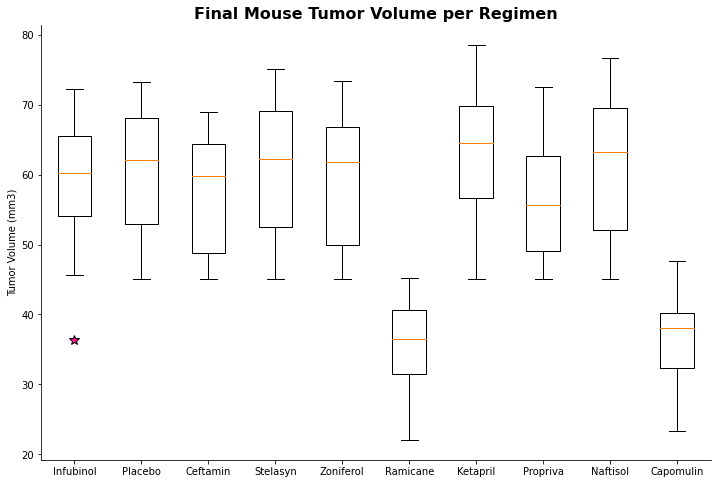

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='deeppink', markersize=10)
fig1,ax1 = plt.subplots()
ax1.set_title('Final Mouse Tumor Volume per Regimen', fontsize=16, fontweight="bold")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], regimen_list)

## Line and Scatter Plots

In [25]:
#Preview cleaned data by Regimen == Capomulin
capomulin_data = cleaned_mouse_df[(cleaned_mouse_df['Drug Regimen']=='Capomulin')]
capomulin_data.value_counts('Mouse ID')

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

Text(0.5, 1.0, 'Tumor Volume vs. Timepoints of Capomulin Mouse m957')

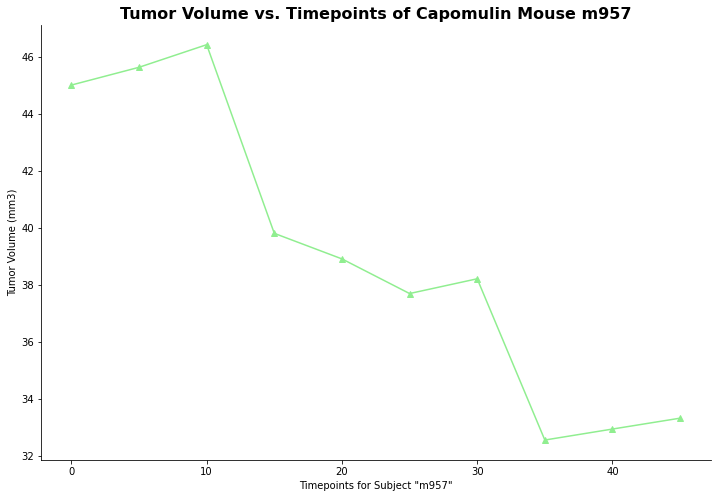

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (review scatterplot activity)
subject_m957 = capomulin_data[(capomulin_data['Mouse ID']=='m957')]

plt.plot(subject_m957['Timepoint'], subject_m957['Tumor Volume (mm3)'], marker='^', color = "lightgreen")
plt.xlabel('Timepoints for Subject "m957"')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoints of Capomulin Mouse m957', fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Average Tumor Volume vs. Average Weight of Capomulin Mice')

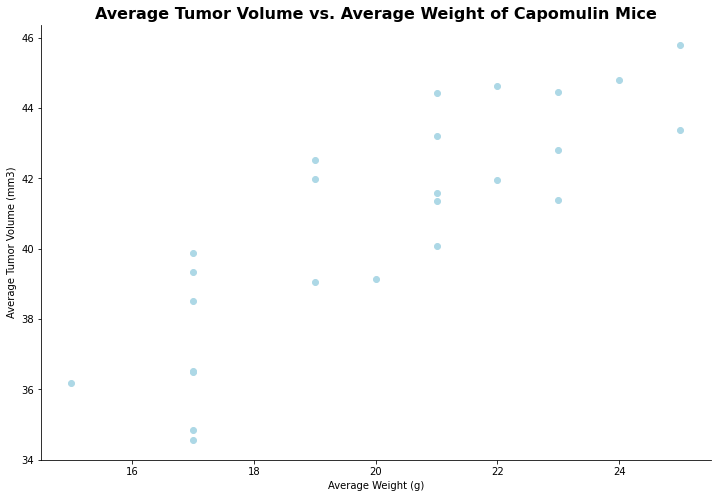

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin = (capomulin_data.groupby('Mouse ID')).mean()

xvalues = avg_capomulin['Weight (g)']
yvalues =  avg_capomulin['Tumor Volume (mm3)']

plt.scatter(xvalues, yvalues, marker='o', color="lightblue")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Weight of Capomulin Mice', fontsize=16, fontweight="bold")

## Correlation and Regression

The correlation between the average tumor volume and weight of Capomulin mice is 0.84


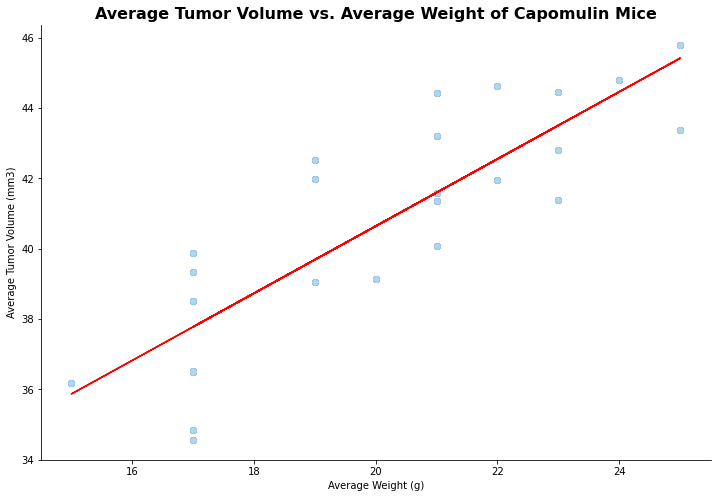

In [28]:
# Correlation and regression for mouse weight and average tumor volume for the Capomulin regimen, use plot from above
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xvalues, yvalues, marker='o', color="lightblue")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Weight of Capomulin Mice', fontsize=16, fontweight="bold") 

#Print correlation coefficient to terminal
print(f"The correlation between the average tumor volume and weight of Capomulin mice is {round(rvalue,2)}")